In [1]:
import laspy
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def analyze_class_distribution(file_paths):
    for file_path in file_paths:
        with laspy.open(file_path) as las_file:
            las = las_file.read()
        
        classifications = las.classification
    
        unique_classes, counts = np.unique(classifications, return_counts=True)
    
        total_points = np.sum(counts)
        print(f"Rozkład klas {file_path}:")
        print(f"Ilość punktów: {total_points}")
        for cls, count in zip(unique_classes, counts):
            percentage = (count / total_points) * 100
            print(f"Klasa {cls}: {count} punktów ({percentage:.2f}%)")
        print(" ")
        # Wizualizacja udziału klas
        plt.figure(figsize=(8, 8))
        plt.pie(counts, labels=[f"Klasa {cls}" for cls in unique_classes], autopct='%1.1f%%')
        plt.title(f"Rozkład klas w {file_path}")
        plt.show()


Rozkład klas LAS/N-34-50-C-c-4-2-2-1.las:
Ilość punktów: 5516640
Klasa 0: 333856 punktów (6.05%)
Klasa 2: 953459 punktów (17.28%)
Klasa 3: 1267141 punktów (22.97%)
Klasa 4: 165639 punktów (3.00%)
Klasa 5: 1457739 punktów (26.42%)
Klasa 6: 1336125 punktów (24.22%)
Klasa 7: 2681 punktów (0.05%)
 


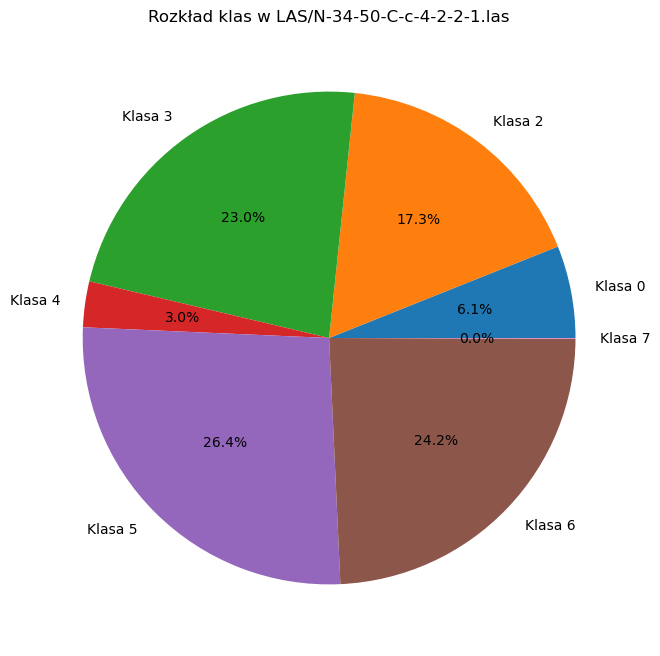

Rozkład klas LAS/N-34-50-C-c-4-2-2-2.las:
Ilość punktów: 5661996
Klasa 0: 324831 punktów (5.74%)
Klasa 2: 932790 punktów (16.47%)
Klasa 3: 1040846 punktów (18.38%)
Klasa 4: 150515 punktów (2.66%)
Klasa 5: 2249808 punktów (39.74%)
Klasa 6: 958322 punktów (16.93%)
Klasa 7: 4884 punktów (0.09%)
 


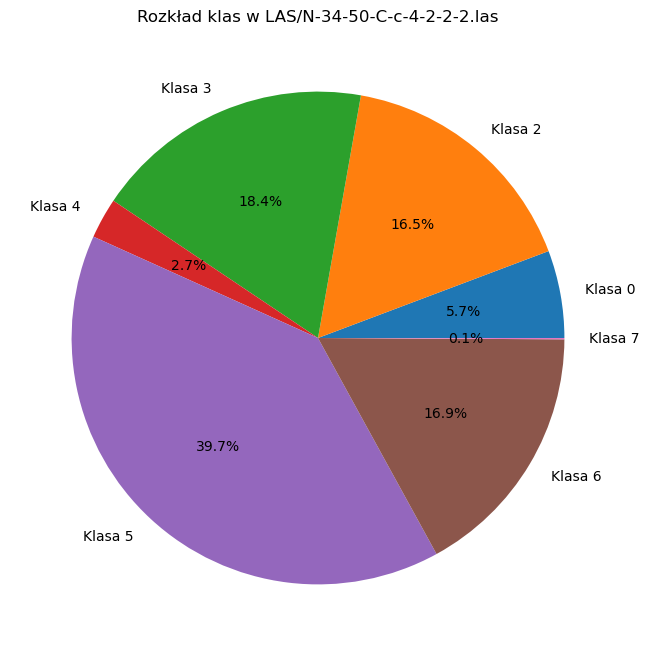

Rozkład klas LAS/N-34-50-C-d-3-3-2-2.las:
Ilość punktów: 4951754
Klasa 0: 123472 punktów (2.49%)
Klasa 2: 2483702 punktów (50.16%)
Klasa 3: 124877 punktów (2.52%)
Klasa 4: 77354 punktów (1.56%)
Klasa 5: 338939 punktów (6.84%)
Klasa 6: 1799599 punktów (36.34%)
Klasa 7: 3811 punktów (0.08%)
 


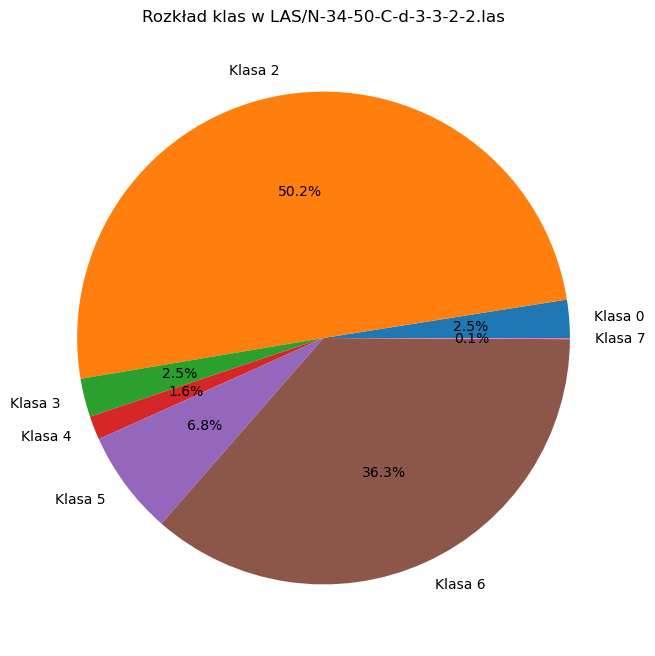

Rozkład klas LAS/N-34-50-C-d-3-3-2-4.las:
Ilość punktów: 4556335
Klasa 0: 85085 punktów (1.87%)
Klasa 2: 2402788 punktów (52.74%)
Klasa 3: 225572 punktów (4.95%)
Klasa 4: 77513 punktów (1.70%)
Klasa 5: 263599 punktów (5.79%)
Klasa 6: 1471376 punktów (32.29%)
Klasa 7: 2798 punktów (0.06%)
Klasa 9: 27604 punktów (0.61%)
 


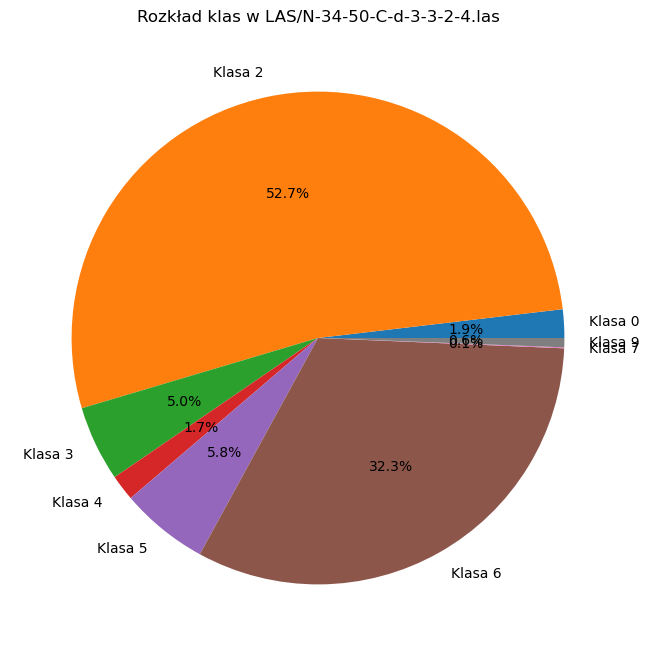

In [13]:
file_paths = ["LAS/N-34-50-C-c-4-2-2-1.las", "LAS/N-34-50-C-c-4-2-2-2.las", "LAS/N-34-50-C-d-3-3-2-2.las", "LAS/N-34-50-C-d-3-3-2-4.las"]
analyze_class_distribution(file_paths)


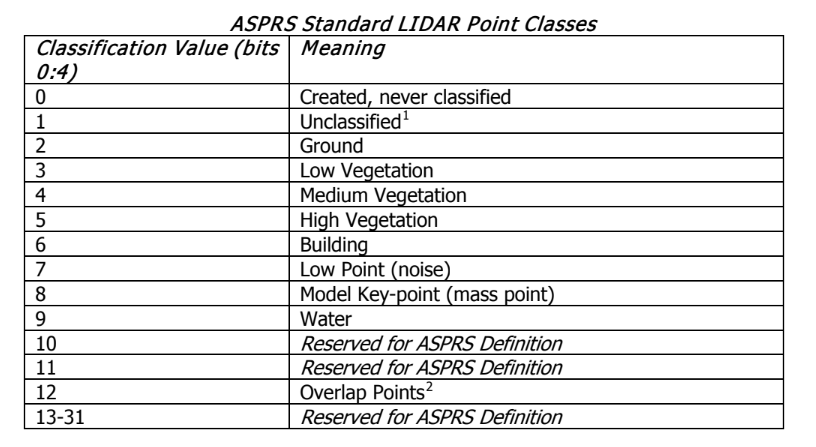

Statystyki intensywności dla poszczególnych klas:
           count        mean        std  min    25%    50%    75%    max
Class                                                                   
2       953459.0  152.765832  63.543134  0.0  110.0  155.0  206.0  255.0
3      1267141.0  150.423653  60.633615  0.0  111.0  151.0  199.0  255.0
4       165639.0  174.900573  74.273367  0.0  122.0  199.0  241.0  255.0
5      1457739.0  153.445600  74.328924  0.0   95.0  167.0  221.0  255.0
6      1336125.0   96.819905  63.684300  0.0   50.0   76.0  140.0  255.0


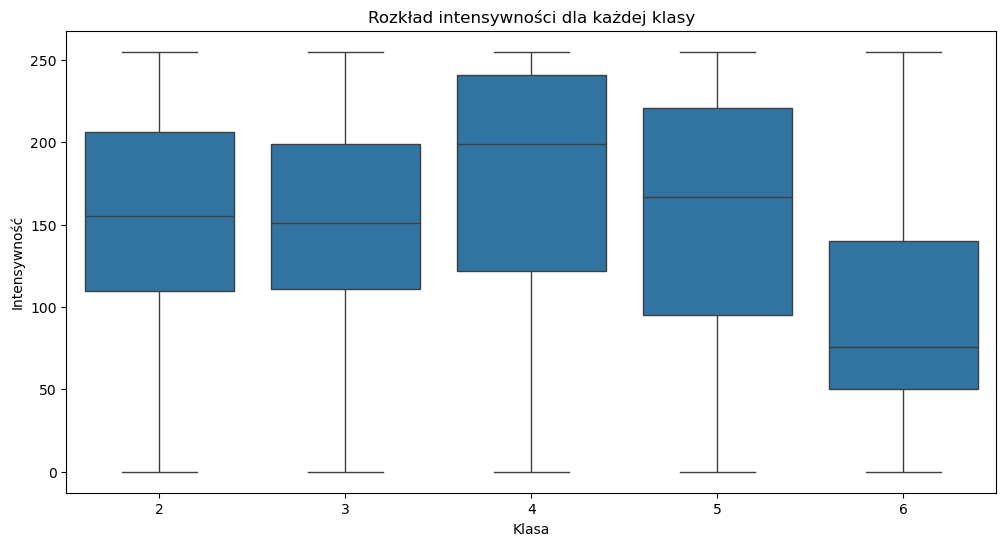

C:\Users\kacpe\AppData\Local\Temp\ipykernel_6180\1467844658.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Klasa")


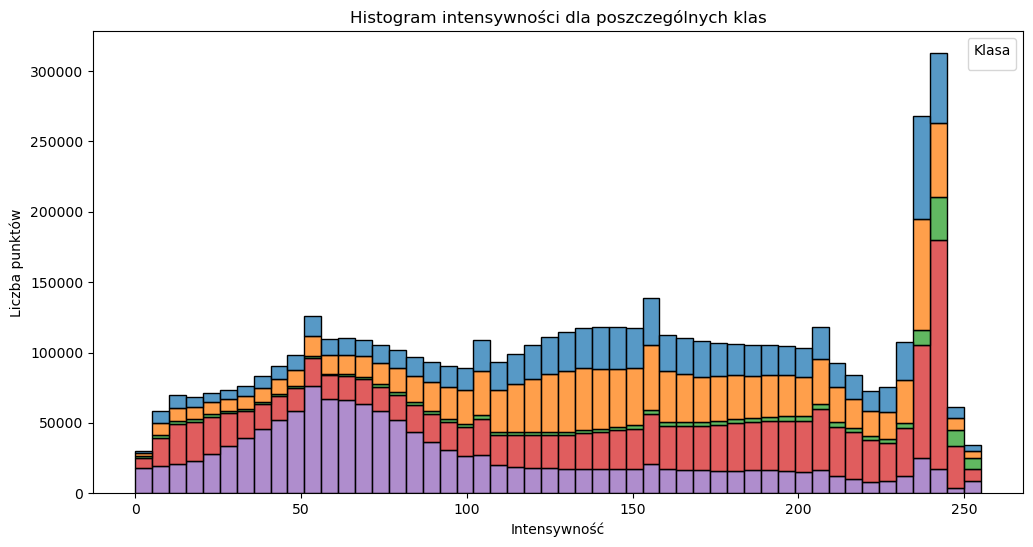

In [15]:
import laspy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_intensity_by_class(file_path):
    
    with laspy.open(file_path) as las_file:
        las = las_file.read()

    classifications = np.array(las.classification)
    intensity = np.array(las.intensity)

    data = pd.DataFrame({
        "Class": classifications,
        "Intensity": intensity
    })

    # Filtr
    data = data[~data["Class"].isin([0, 7])]

    stats = data.groupby("Class")["Intensity"].describe()
    print("Statystyki intensywności dla poszczególnych klas:")
    print(stats)

    # Wizualizacja rozkładu intensywności
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Class", y="Intensity", data=data)
    plt.title("Rozkład intensywności dla każdej klasy")
    plt.xlabel("Klasa")
    plt.ylabel("Intensywność")
    plt.show()

    # Histogram intensywności dla każdej klasy
    plt.figure(figsize=(12, 6))
    sns.histplot(data, x="Intensity", hue="Class", multiple="stack", bins=50, palette="tab10")
    plt.title("Histogram intensywności dla poszczególnych klas")
    plt.xlabel("Intensywność")
    plt.ylabel("Liczba punktów")
    plt.legend(title="Klasa")
    plt.show()

file_paths = ["LAS/N-34-50-C-c-4-2-2-1.las", "LAS/N-34-50-C-c-4-2-2-2.las", "LAS/N-34-50-C-d-3-3-2-2.las", "LAS/N-34-50-C-d-3-3-2-4.las"]
analyze_intensity_by_class(file_paths[0])

